# rlearn
Learning machine learning algorithms.

# Table of Contents
- [Linear Models](#Linear-Models)  
    - [Binary Classification](#binary-classification)  
        - [Standard Perceptron](#standard-perceptron)  
        - [Logistic Regression](#perceptron-with-sigmoid-activation)
    - [Regression](#regression)  
        - [Ordinary Least Squares](#ordinary-least-squares)
        - [Linear Regression](#perceptron-with-linear-activation)
        - [Elastic Net](#elastic-net)
- [Neural Networks](#neural-networks)  
    - [Regression](#regression-with-neural-network)  
        - [Multilayer Perceptron](#multilayer-perceptron)
    - [Multiclass Classification](#multiclass-classification)  
        - [Multilayer Perceptron](#multilayer-perceptron-classification)
        - [Convolutional Neural Network](#convolutional-neural-network)  
- [Trees](#trees)
    - [Regression](#regression-with-trees)  
        - [Decision Tree](#decision-tree-regressor)  
    - [Classification](#classification-with-trees)  
        - [Classification Tree](#decision-tree-classifier)

## [Linear Models](rlearn\linear_model.py)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from rlearn.solvers import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error, classification_report

np.set_printoptions(precision=2, suppress=1)

### Binary Classification

Dataset used for binary classification examples:

In [2]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Standard Perceptron

In [3]:
from rlearn.linear_model import Perceptron
standard_perceptron = Perceptron(solver='perceptron', activation='step', loss_function='perceptron')
standard_perceptron.fit(X_train, y_train)

print(classification_report(y_test, standard_perceptron.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.92      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.95      0.95      0.95       114



#### Perceptron with  Sigmoid Activation
Which is equivalent to a Logistic Regression

In [13]:
logistic_model = Perceptron(activation='sigmoid', loss_function='logloss')
logistic_model.fit(X_train, y_train)

print(classification_report(y_test, logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        43
           1       0.90      1.00      0.95        71

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



### Regression

Dataset used for regression examples

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Ordinary Least Squares

In [24]:
from rlearn.linear_model import OLS

ols = OLS()
ols.fit(X_train, y_train)
print('Mean Squared Error:',mean_squared_error(y_test, ols.predict(X_test)))

Mean Squared Error: 2900.1936284934795


#### Perceptron with Linear Activation
Which is equivalent to a simple Linear Regression

In [29]:
linear_regression = Perceptron(activation='linear', 
                    solver=StochasticGradientDescent(learning_rate=0.1, momentum=0.9))
linear_regression.fit(X_train, y_train, epochs=100000)
print('Mean Squared Error:',mean_squared_error(y_test, linear_regression.predict(X_test)))

Mean Squared Error: 2886.3682400969315


#### Elastic Net

In [69]:
from rlearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=1, l1_ratio=1, learning_rate=0.01, solver='sgd')
elastic_net.fit(X_train, y_train, verbose=0, epochs=100000)
print('Mean Squared Error:',mean_squared_error(y_test, elastic_net.predict(X_test)))

Mean Squared Error: 2945.079897872204


## [Neural Networks](rlearn/nn.py)  
<sub>[Back to top.](#table-of-contents)</sub>


### Regression with Neural Network

#### Multilayer Perceptron

In [72]:
from rlearn.nn import NNModel, FC
from rlearn.activation_functions import *
from rlearn.regularization import Regularization

mlp_regularization = NNModel(loss='mse', input_dim=X_train.shape[1:], layers=[
    FC(16, regularization=Regularization(alpha=1, l1_ratio=1)),
    FC(1, activation=Relu())
])

mlp_regularization.fit(X_train, y_train, X_test, y_test, epochs=50000, verbose=10000)
print('Mean Squared Error:',mean_squared_error(y_test, mlp_regularization.predict(X_test, 1)))

Epoch 1: Training Loss 27955.21	Test Loss 26366.34
Epoch 10000: Training Loss 2931.24	Test Loss 2783.92
Epoch 20000: Training Loss 2790.74	Test Loss 2667.35
Epoch 30000: Training Loss 2749.40	Test Loss 2628.80
Epoch 40000: Training Loss 2710.99	Test Loss 2624.76
Epoch 50000: Training Loss 2686.43	Test Loss 2617.87
Mean Squared Error: 2617.8651642833656


### Multiclass Classification

Dataset used for multiclass classification

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(*X_train.shape, 1)
X_test = X_test.reshape(*X_test.shape, 1)
X_train = X_train / 255
X_test = X_test / 255

#### Multilayer Perceptron Classification

In [96]:
from rlearn.nn import Squeezing
mlp_regularization = NNModel(input_dim=X_train.shape[1:], layers=[
    Squeezing(),
    FC(30, regularization=Regularization(alpha=1, l1_ratio=0)),
    FC(10, activation=Softmax())
])

mlp_regularization.fit(X_train, y_train, X_test, y_test, epochs=10, verbose=2)
print(classification_report(y_test, mlp_regularization.predict(X_test)))

Epoch 1: Training Loss 0.10	Training Accuracy 0.66	Test Loss 0.09	Test Accuracy 0.69
Epoch 2: Training Loss 0.08	Training Accuracy 0.72	Test Loss 0.07	Test Accuracy 0.75
Epoch 4: Training Loss 0.06	Training Accuracy 0.79	Test Loss 0.06	Test Accuracy 0.79
Epoch 6: Training Loss 0.05	Training Accuracy 0.83	Test Loss 0.05	Test Accuracy 0.81
Epoch 8: Training Loss 0.05	Training Accuracy 0.84	Test Loss 0.05	Test Accuracy 0.82
Epoch 10: Training Loss 0.05	Training Accuracy 0.82	Test Loss 0.05	Test Accuracy 0.82
              precision    recall  f1-score   support

           0       0.66      0.90      0.76      1000
           1       0.99      0.93      0.95      1000
           2       0.71      0.71      0.71      1000
           3       0.86      0.83      0.84      1000
           4       0.68      0.80      0.73      1000
           5       0.95      0.89      0.92      1000
           6       0.70      0.36      0.47      1000
           7       0.92      0.88      0.90      1000
  

#### Convolutional Neural Network

In [98]:
from rlearn.nn import Conv3C, MaxPooling

convnn_regularization = NNModel(input_dim=X_train.shape[1:], layers=[
    Conv3C(kernel_size=3, n_chanels_kernel=X_train.shape[-1], out_channels=8, 
           regularization=Regularization(1, 0)),
    MaxPooling(),
    Squeezing(),
    FC(10, activation=Softmax())
])

convnn_regularization.fit(X_train, y_train, X_test, y_test, epochs=10, verbose=2)
print(classification_report(y_test, convnn_regularization.predict(X_test)))

Epoch 1: Training Loss 0.06	Training Accuracy 0.79	Test Loss 0.07	Test Accuracy 0.77
Epoch 2: Training Loss 0.04	Training Accuracy 0.82	Test Loss 0.06	Test Accuracy 0.82
Epoch 4: Training Loss 0.03	Training Accuracy 0.87	Test Loss 0.05	Test Accuracy 0.84
Epoch 6: Training Loss 0.03	Training Accuracy 0.88	Test Loss 0.04	Test Accuracy 0.86
Epoch 8: Training Loss 0.03	Training Accuracy 0.89	Test Loss 0.04	Test Accuracy 0.87
Epoch 10: Training Loss 0.03	Training Accuracy 0.88	Test Loss 0.04	Test Accuracy 0.87
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.80      0.76      0.78      1000
           3       0.86      0.90      0.88      1000
           4       0.76      0.82      0.79      1000
           5       0.97      0.96      0.96      1000
           6       0.64      0.64      0.64      1000
           7       0.95      0.92      0.94      1000
  

## [Trees](rlearn/tree.py)  
<sub>[Back to top.](#table-of-contents)</sub>

### Regression with Trees

Dataset used for Regression. My implementation of Decision Trees requieres DataFrame as input.

In [10]:
from rlearn.tree_utils import plot_tree

data = load_diabetes(as_frame=True)['frame']
split_delimiter = int(len(data)*0.7)
X_train = data[:split_delimiter]
X_test = data[split_delimiter:]
target_col = 'target'

#### Decision Tree Regressor

In [11]:

from rlearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=20)
dtr.fit(X_train, target_col)

print('Mean Squared Error:',mean_squared_error(X_test[target_col], dtr.predict(X_test)))

Mean Squared Error: 4193.494500508087


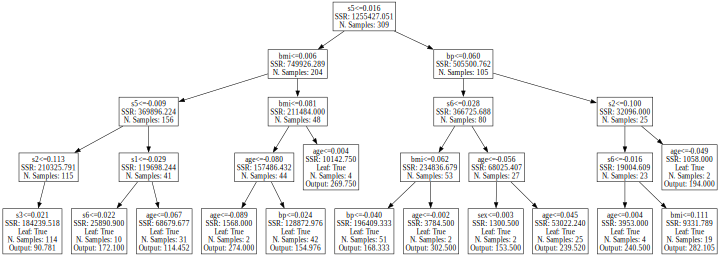

In [12]:
plot_tree(dtr)

### Classification with Trees

Dataset used for classification with Trees.

In [13]:
from sklearn.datasets import load_wine

data = load_wine(as_frame=True)['frame'].sample(frac=1)
split_delimiter = int(len(data)*0.7)
X_train = data[:split_delimiter]
X_test = data[split_delimiter:]
target_col = 'target'

#### Decision Tree Classifier

In [17]:
from rlearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4, min_samples_split=20)
dtc.fit(X_train, target_col)

print(classification_report(X_test[target_col], dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       0.90      0.86      0.88        21
           2       0.88      0.70      0.78        10

    accuracy                           0.89        54
   macro avg       0.89      0.85      0.86        54
weighted avg       0.89      0.89      0.89        54



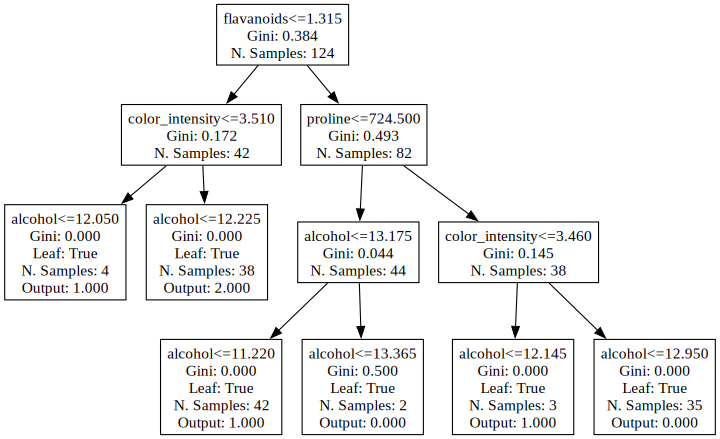

In [18]:
plot_tree(dtc)

<sub>[Back to top.](#table-of-contents)</sub>